In [2]:
%pip install seaborn

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('medical_examination.csv')
df['height'] = df['height'] / 100
df['BMI'] = df['weight'] / df['height'] ** 2
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,1.68,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,22601,1,1.58,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,19066,2,1.83,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,22431,1,1.63,72.0,135,80,1,2,0,0,0,1,27.099251


In [6]:
overweight = []

for value in df['BMI'] :
    if value > 25 :
            overweight.append(1)
    else:
        overweight.append(0)
        
        
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,1.68,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,22601,1,1.58,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,19066,2,1.83,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,22431,1,1.63,72.0,135,80,1,2,0,0,0,1,27.099251


In [7]:
df['overweight'] = overweight 
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,1.68,76.0,120,80,1,1,1,0,1,0,26.927438,1
69996,99995,22601,1,1.58,126.0,140,90,2,2,0,0,1,1,50.472681,1
69997,99996,19066,2,1.83,105.0,180,90,3,1,0,1,0,1,31.353579,1
69998,99998,22431,1,1.63,72.0,135,80,1,2,0,0,0,1,27.099251,1


In [8]:
df['cholesterol'] = np.where((df['cholesterol'] == 1), 0, df['cholesterol'])
df['cholesterol'] = np.where((df['cholesterol'] > 1), 1, df['cholesterol'])  
df['gluc'] = np.where((df['gluc'] == 1), 0, df['gluc'])
df['gluc'] = np.where((df['gluc'] > 1), 1, df['gluc'])

In [9]:
df_melt = pd.melt(df, id_vars='cardio', value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_melt

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


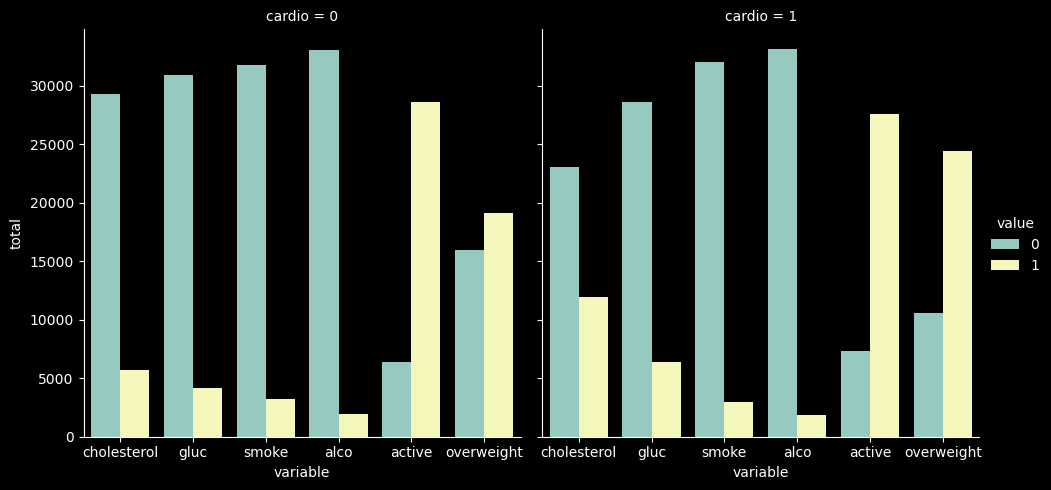

In [11]:
fig= sns.catplot(data=df_melt, kind='count', x='variable', hue='value', col='cardio')
fig.set(xlabel="variable", ylabel = "total")
plt.style.use('dark_background')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

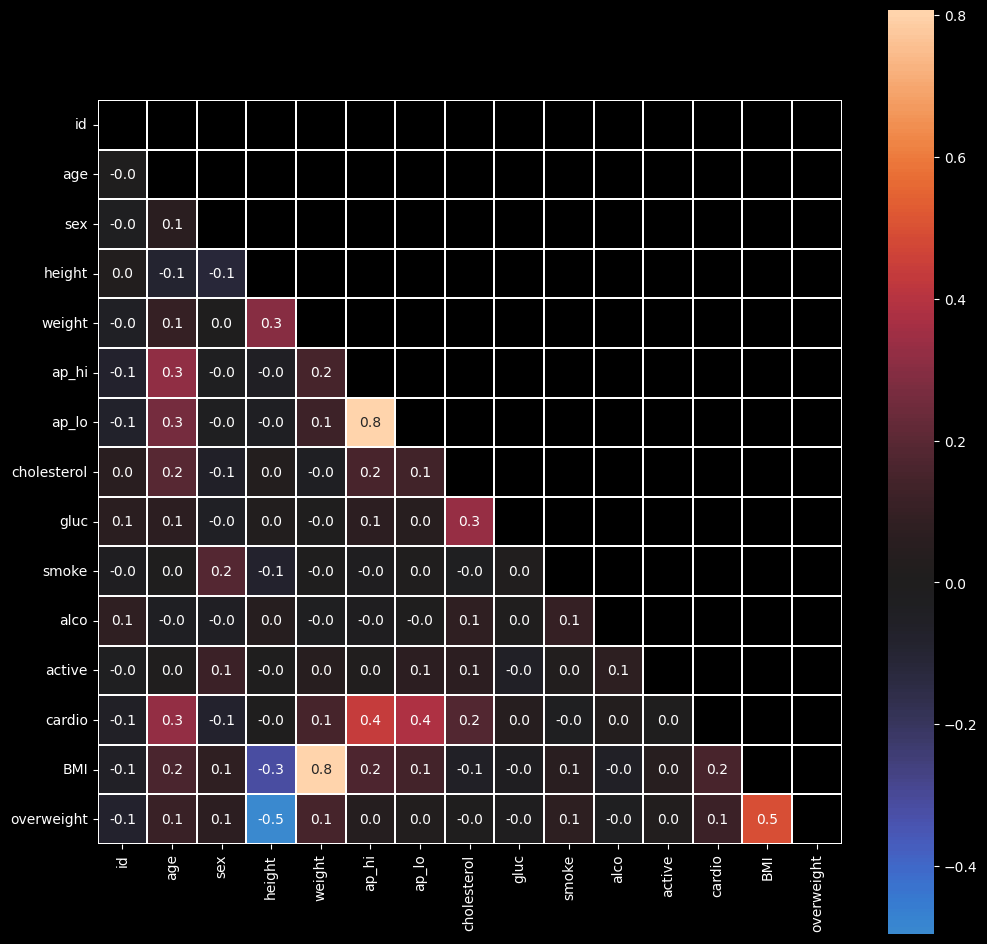

In [12]:
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] <= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] <= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]

corr = df_heat.corr(method="pearson")

mask = np.triu(corr)

fig, ax = plt.subplots(figsize=(12,12))

sns.heatmap(corr, linewidths=0.01, annot = True, square = True, mask = mask, fmt =".1f",center =0)

plt.savefig('heat.png', dpi=300, bbox_inches='tight')